# PI7 Deel 2 - Niema Mahmoudi & Silas Dannullis

## Decision Tree Regressor

### Stap 1: Train-Test split

In deze stap wordt de dataset verdeeld in een trainingsset en een testset. De features (onafhankelijke variabelen) worden gebruikt om het model te trainen, terwijl de target (afhankelijke variabele) wordt gebruikt om het model te evalueren.

- **Features**: Alle kolommen behalve `medv` worden als features gebruikt.
  - De `medv`-kolom wordt niet gebruikt als feature, omdat deze de target variabele is.
- **Target**: De `medv`-kolom wordt als de target variabele gebruikt.
- **Verdeling**: 80% van de data wordt gebruikt voor training en 20% voor testen.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# dataset laden
url = "preprocessed_boston_housing.csv"
df = pd.read_csv(url)

# feature en target variabelen definiëren 
X = df.drop(columns=['medv'])
y = df['medv']

# splits de data in training- en testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Stap 2: Hyperparameter Tuning

Er wordt gebruik gemaakt van `GridSearchCV` om de beste hyperparameters voor het Decision Tree Regressor model te vinden. Dit helpt bij het verbeteren van de modelprestaties door de optimale waarden voor verschillende hyperparameters te bepalen.

- **Model**: Decision Tree Regressor
- **Parameter Grid**: 
  - `{'max_depth': [3, 5, 7, 10, None],`
  - `'min_samples_split': [2, 5, 10],`
  - `'min_samples_leaf': [1, 2, 4],`
  - `'max_features': [None, 'sqrt', 'log2']}`
- **Cross-Validation**: 5-voudige cross-validatie wordt gebruikt om de beste hyperparameters te selecteren.

In [2]:
# hyperparameter Tuning met Grid Search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# train een Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
#tree_reg.fit(X_train, y_train)

# Voer Grid Search uit met 5-voudige cross-validatie
grid_search = GridSearchCV(estimator=tree_reg, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Beste parameters en score
print("Beste parameters:", grid_search.best_params_)
print("Beste R^2 score:", grid_search.best_score_)

Beste parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
Beste R^2 score: 0.7131070802057845


### Stap 3: Model Training

Het model wordt getraind met de beste hyperparameters die zijn gevonden tijdens de hyperparameter tuning. Hiervoor wordt de `DecisionTreeRegressor` klasse van scikit-learn gebruikt.

- **Model**: Decision Tree Regressor met de beste hyperparameters.
- **Trainingsset**: De getrainde features (`X_train`) en de target (`y_train`) worden gebruikt om het model te fitten.

In [3]:

# voorspellingen
best_tree_reg = grid_search.best_estimator_
y_pred_best = best_tree_reg.predict(X_test)

### Stap 4: Voorspelling en Evaluatie

Het getrainde model wordt gebruikt om voorspellingen te doen op de testset. De prestaties van het model worden geëvalueerd met behulp van Mean Squared Error (MSE) en de R² score. Daarnaast wordt een voorbeeld predictie getoond om de werking van het model te illustreren.

- **Voorspellingen**: Het model maakt voorspellingen (`y_pred_best`) op basis van de testset (`X_test`).
- **Evaluatie**:
  - **Mean Squared Error (MSE)**: Gemiddelde kwadraat van de fouten tussen de voorspelde waarden en de werkelijke waarden. Een lagere MSE betekent een beter model.
  - **R² Score**: Verhouding van verklaarde variantie. Een waarde dichter bij 1 betekent een beter model.
- **Cross-Validation Scores**: 5-voudige cross-validatie wordt toegepast om robuuste prestatiemetingen te verkrijgen.
  - **R² scores** van cross-validatie
  - **Gemiddelde R² score** van cross-validatie

### Voorbeeld Predictie

Een willekeurige index uit de testset wordt geselecteerd. De feature-waarden voor deze index worden opgehaald en gebruikt om een voorspelling te maken. De werkelijke `medv` waarde en de voorspelde `medv` waarde worden vergeleken om de nauwkeurigheid van de voorspelling te illustreren.


## Random Forest 

Het model wordt getraind met de training dataset. Hiervoor wordt de `RandomForestRegressor` van scikit-learn gebruikt.

- **Model**: Random Forest Regressor met 100 bomen (`n_estimators`).
- **Trainingsset**: De getrainde features (`X_train`) en de target (`y_train`) worden gebruikt om het model te fitten.


In [5]:
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
import seaborn as sns


# train een Random Forest Regressor 
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

# voorspellingen
y_pred_rf = forest_reg.predict(X_test)

# evaluatie
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R² Score:", r2_rf) 

# print een set van de voorspellingen
print("\nWerkelijke waarden vs. Voorspelde waarden voor een subset van de testset:")
for i in range(10):  # Print de eerste 10 voorspellingen
    print(f"Werkelijke waarde: {y_test.iloc[i]:.2f}, Voorspelde waarde: {y_pred_rf[i]:.2f}") 


# voorbeeld Predictie
random_index = np.random.randint(0, len(X_test))

# haal de feature-waarden op voor deze index
example_features = X_test.iloc[random_index]
example_actual_medv = y_test.iloc[random_index]

# maak een predictie voor deze waarden
example_predicted_medv = forest_reg.predict([example_features])[0]

# toon de resultaten
print("\nVoorbeeld predictie:")
print(f"Feature waarden: {example_features}")
print(f"Werkelijke MEDV waarde: {example_actual_medv}")
print(f"Voorspelde MEDV waarde: {example_predicted_medv}")

Random Forest Mean Squared Error: 0.07587239342894808
Random Forest R² Score: 0.8882228924403841

Werkelijke waarden vs. Voorspelde waarden voor een subset van de testset:
Werkelijke waarde: 0.42, Voorspelde waarde: 0.15
Werkelijke waarde: -0.10, Voorspelde waarde: 0.01
Werkelijke waarde: -0.24, Voorspelde waarde: 0.21
Werkelijke waarde: 2.99, Voorspelde waarde: 1.49
Werkelijke waarde: 0.09, Voorspelde waarde: 0.16
Werkelijke waarde: -1.07, Voorspelde waarde: -0.82
Werkelijke waarde: 0.85, Voorspelde waarde: 1.04
Werkelijke waarde: 0.25, Voorspelde waarde: 0.06
Werkelijke waarde: -0.25, Voorspelde waarde: -0.05
Werkelijke waarde: -1.67, Voorspelde waarde: -1.48

Voorbeeld predictie:
Feature waarden: crim      -0.417302
zn         2.731245
indus     -1.194528
chas       0.000000
nox       -1.094434
rm         0.442165
age       -1.663342
dis        0.763470
rad       -0.752922
tax       -0.927937
ptratio   -0.071913
b          0.427127
lstat     -1.168077
Name: 39, dtype: float64
Werkel

C:\Users\sdann\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


### Visualisatie van een Decision Tree uit het Random Forest

Om een dieper inzicht te krijgen in de werking van het Random Forest model, zijn er enkele decision tree uit het bos visualiseerd. Dit geeft een idee van hoe de individuele bomen bijdragen aan de uiteindelijke voorspellingen.

In dit voorbeeld worden de eerste decision trees (`estimators_[0]`) uit het getrainde Random Forest model gevisualiseerd.

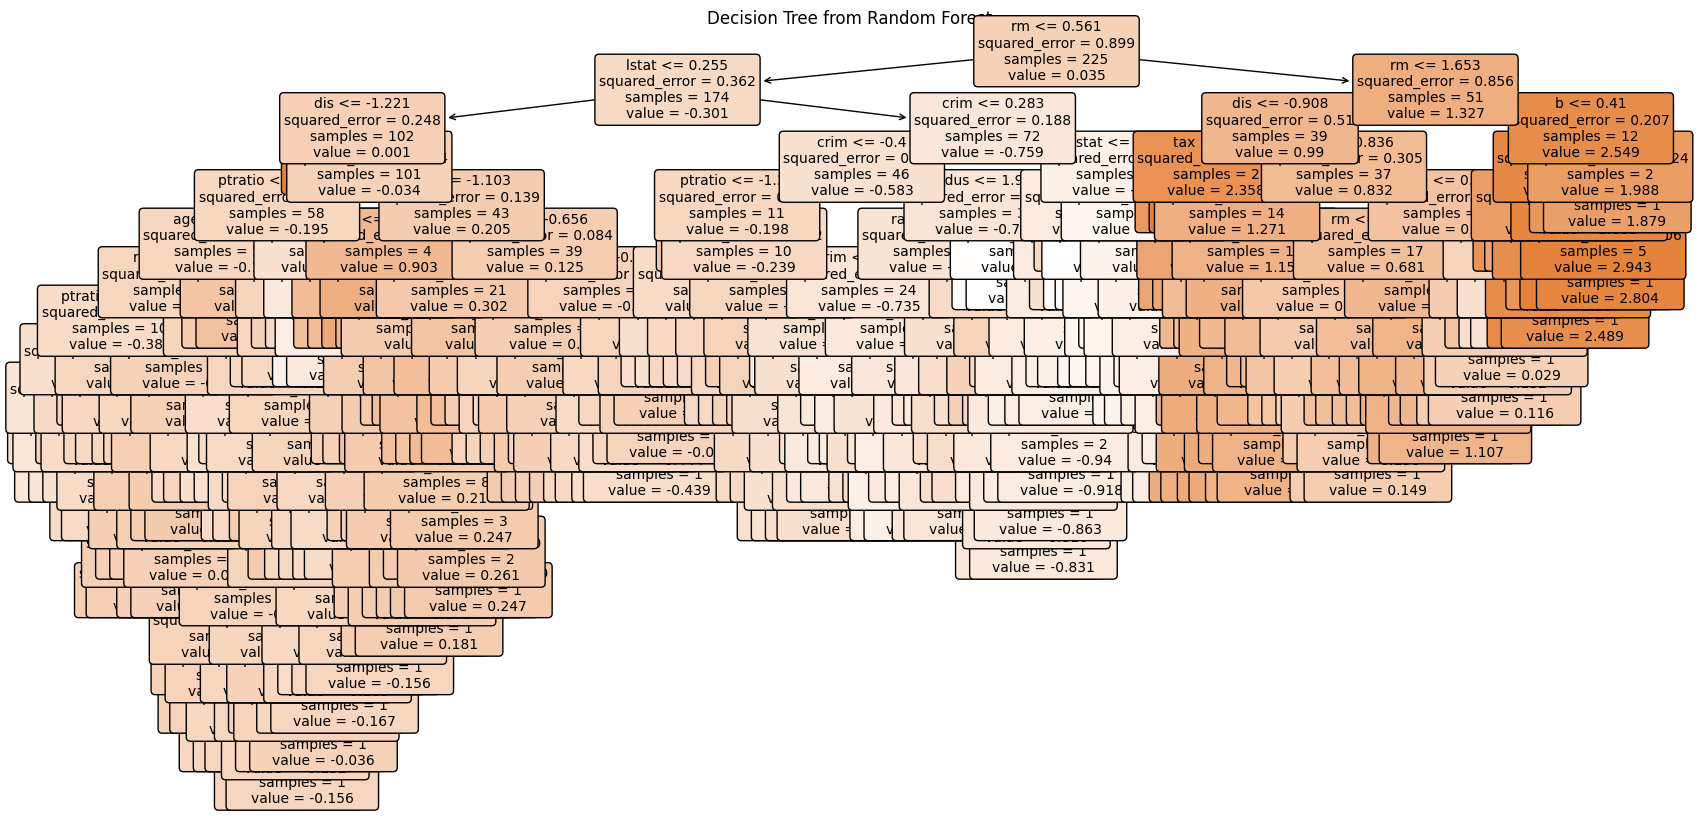

In [6]:
tree_to_plot = forest_reg.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

## Coclusie 

Bij het toepassen van Decision Tree Regressor en Random Forest Regressor op de Boston Housing dataset zijn de volgende resultaten verkregen:

**Decision Tree Regressor**:
- Beste parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
- Beste R² score (cross-validatie): 0.7160
- Mean Squared Error (MSE) op de testset: 0.2620
- R² score op de testset: 0.4522

De Decision Tree Regressor modelde de data redelijk goed met een R² score van 0.4522 op de testset. Dit betekent dat ongeveer 45.22% van de variabiliteit in de doelvariabele door het model wordt verklaard. Hoewel het model de beste prestaties leverde tijdens de cross-validatie met een R² score van 0.7160, was de prestatie op de testset aanzienlijk lager.

**Random Forest Regressor:**
- Random Forest Mean Squared Error (MSE) op de testset: 0.12595
- Random Forest R² score op de testset: 0.7367

Het Random Forest model presteerde beter dan de Decision Tree Regressor met een R² score van 0.7367 op de testset, wat betekent dat 73.67% van de variabiliteit in de doelvariabele door het model wordt verklaard. De lagere Mean Squared Error (MSE) van 0.12595 wijst op nauwkeurigere voorspellingen in vergelijking met de Decision Tree Regressor.